In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

In [8]:
right = pd.read_csv('60cm-try2-pilot_test/3-right_leg_tibi_20250429_191949_432.csv', skiprows=10, sep=",")
left = pd.read_csv('60cm-try2-pilot_test/2-left_leg_tibia_20250429_191949_431.csv', skiprows=10, sep=",")
pelvis = pd.read_csv('60cm-try2-pilot_test/1-pelvis(s2)_20250429_191949_424.csv', skiprows=10, sep=",")

In [9]:
time = right['SampleTimeFine']-right['SampleTimeFine'].iloc[0]
right['Tim-se']= time*1e-6
right['Tim_dt'] = right['Tim-se'].diff()
right['a_z'] = right['dv[3]'] / right['Tim_dt']

left['Tim-se'] = time * 1e-6
left['Tim_dt'] = left['Tim-se'].diff()
left['a_z'] = left['dv[3]'] / left['Tim_dt']

# For left dataframe

pelvis['Tim-se'] = time* 1e-6
pelvis['Tim_dt'] = pelvis['Tim-se'].diff()
pelvis['a_z'] = pelvis['dv[3]'] / pelvis['Tim_dt']

In [10]:
left['a_z'].describe()

count    426.000000
mean      -1.192490
std        9.286726
min      -91.013800
25%       -2.008940
50%       -1.181346
75%        0.375247
max       87.224096
Name: a_z, dtype: float64

In [11]:
right['a_z'].describe()

count    426.000000
mean      -1.408086
std        9.533437
min     -107.946121
25%       -1.326348
50%       -0.721066
75%       -0.042419
max       67.295434
Name: a_z, dtype: float64

In [12]:
pelvis['a_z'].describe()

count    426.000000
mean       2.809293
std        4.997978
min      -10.958901
25%        1.229555
50%        1.789494
75%        2.244300
max       54.819104
Name: a_z, dtype: float64

<Axes: title={'center': 'Pelvis Acc Z vs Time'}, xlabel='Tim-se'>

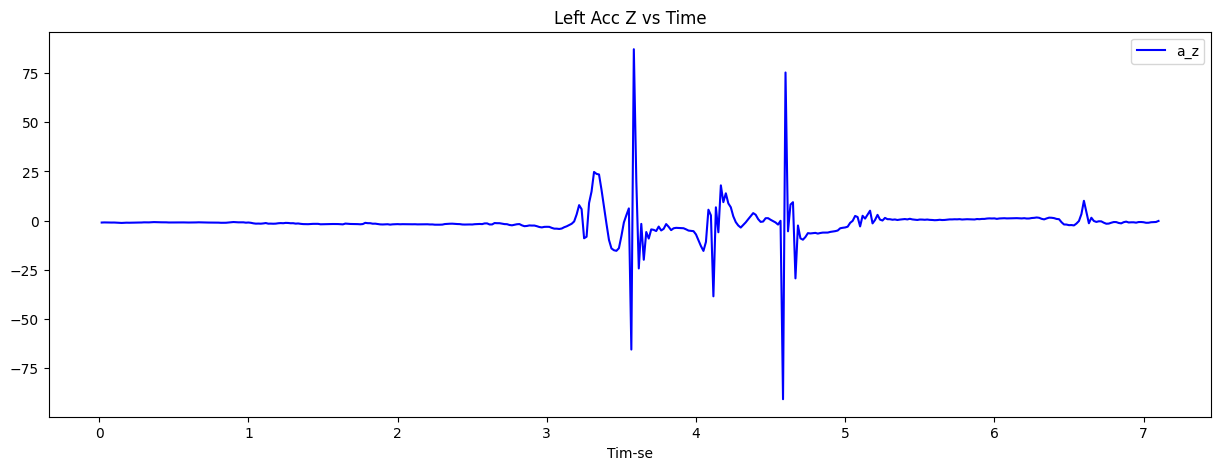

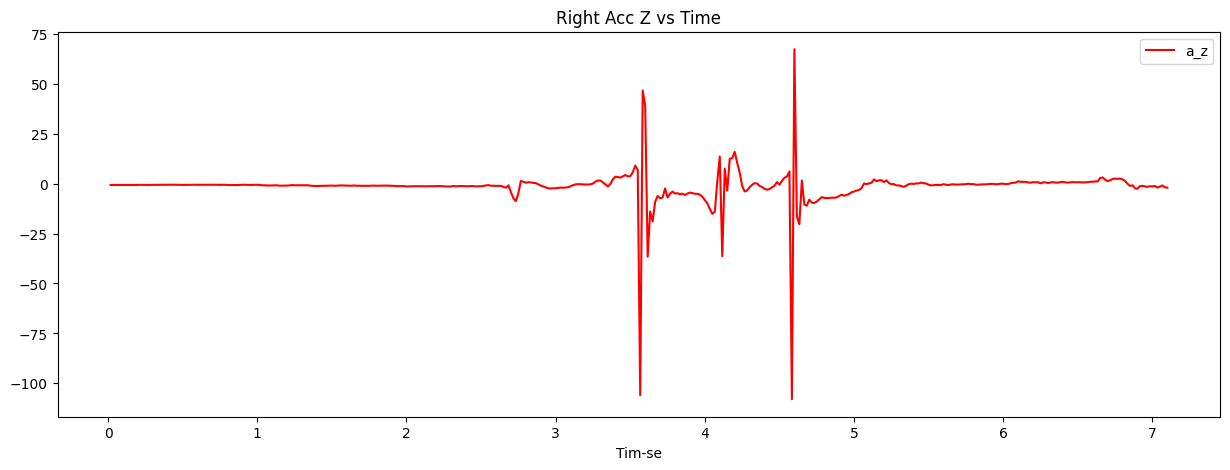

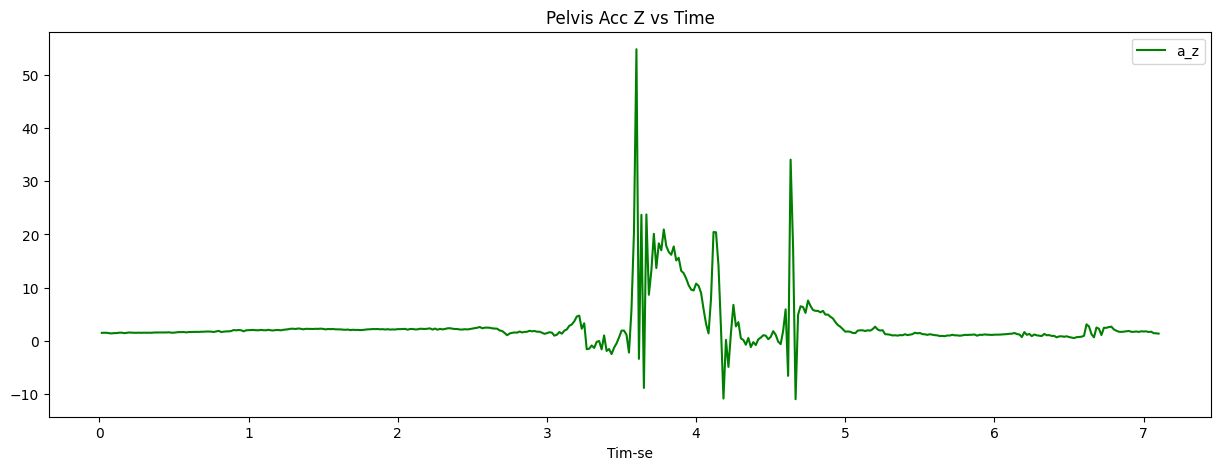

In [13]:
# Visualize the data and find the connection between the accelerometer and ties
left.plot(x='Tim-se', y='a_z', title='Left Acc Z vs Time', figsize=(15, 5), color='blue')
right.plot(x='Tim-se', y='a_z', title='Right Acc Z vs Time', figsize=(15, 5), color='red')
pelvis.plot(x='Tim-se', y='a_z', title='Pelvis Acc Z vs Time', figsize=(15, 5), color='green')
